In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print('X_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)


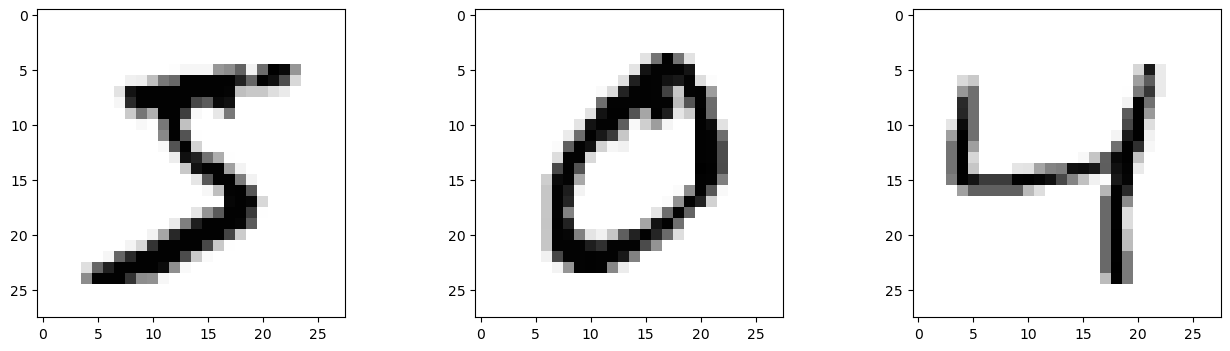

In [4]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
for i in range(3):
    image = np.reshape(x_train[i], (28, 28))
    ax[i].imshow(image, cmap='Greys');

Preprocessing Before Model

In [5]:
x_valid = x_train[48000:]
y_valid = y_train[48000:]

x_train = x_train[:48000]
y_train = y_train[:48000]

In [6]:
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

48000 train samples
12000 validation samples
10000 test samples


In [7]:
# Flattening the images from the 28x28 pixels to 1D

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

In [9]:
# Normalizing pixel values (0-255) > (0-1)

x_train /= 255
x_test /= 255

In [10]:
# One-hot encoding using keras

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

Building Classification Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

model = Sequential()

# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

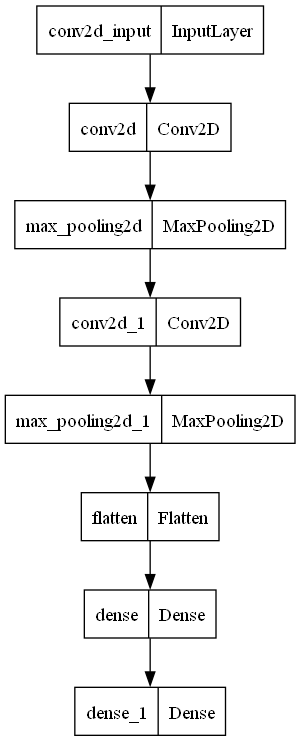

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [14]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [15]:
# training the model for 2 epochs
history = model.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_valid, y_valid))
history

Epoch 1/3
375/375 [==============================] - 25s 63ms/step - loss: 0.3312 - accuracy: 0.9016 - val_loss: 16.3552 - val_accuracy: 0.9648
Epoch 2/3
375/375 [==============================] - 21s 56ms/step - loss: 0.0868 - accuracy: 0.9745 - val_loss: 10.5903 - val_accuracy: 0.9786
Epoch 3/3
375/375 [==============================] - 22s 60ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 11.1133 - val_accuracy: 0.9774


In [16]:
test_scores = model.evaluate(x_test, y_test,verbose = 0)

print("Train Accuracy =", history.history['accuracy'][-1])
print("Validation Accuracy =", history.history['val_accuracy'][-1])
print('Test accuracy:', test_scores[1])
print("--------------------------------------")
print("Train Loss =", history.history['loss'][-1])
print("Validation Loss =", history.history['val_loss'][-1])
print('Test loss:', test_scores[0])

Train Accuracy = 0.9827291369438171
Validation Accuracy = 0.9774166941642761
Test accuracy: 0.9829000234603882
--------------------------------------
Train Loss = 0.05741654336452484
Validation Loss = 11.113259315490723
Test loss: 0.0557919442653656


<Figure size 640x480 with 0 Axes>

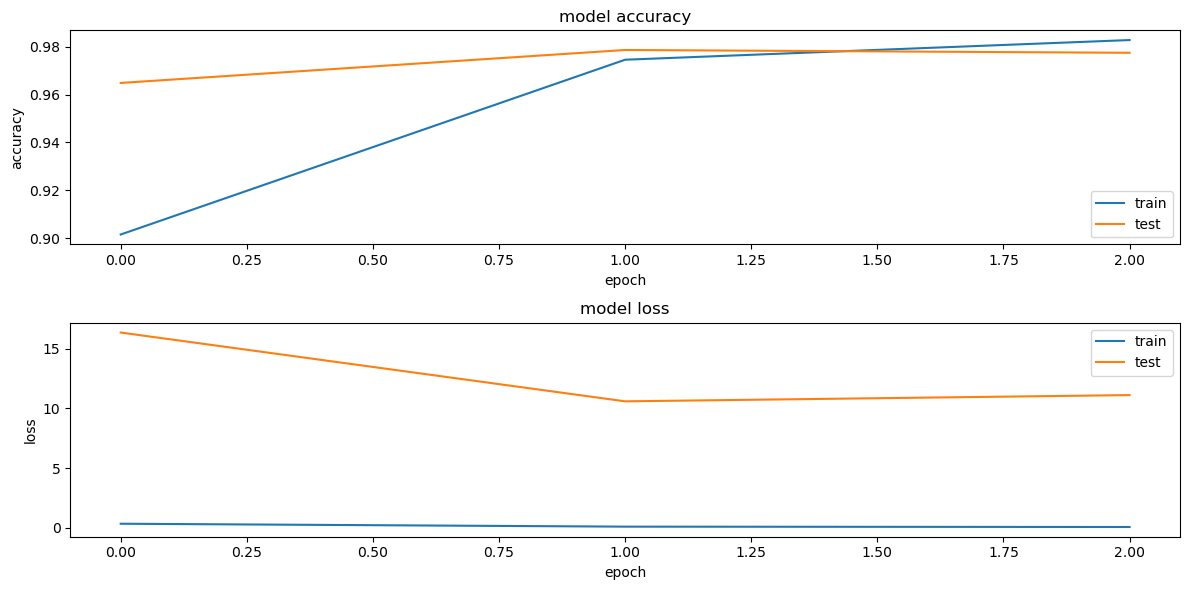

In [17]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig;

2D Visualizing Data in 2D Latent Dimensions with t-SNE

In [18]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
x = x_train.reshape(60000,784)

TruncatedSVD

We will use t-SNE as the model for 2 dimension, but before we will use TruncatedSVD to reduce the dimension to 50. Because, in essence, tSNE requires pairwise comparison of datapoints, so it can be incredibly computationally taxing on scRNA-seq datasets unless the dimensionality undergoes an initial reduction.

In [20]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=50).fit_transform(x)

In [22]:
from sklearn.manifold import TSNE
tsne_res = TSNE(n_components=2, n_jobs = -1, random_state = 42).fit_transform(tsvd)

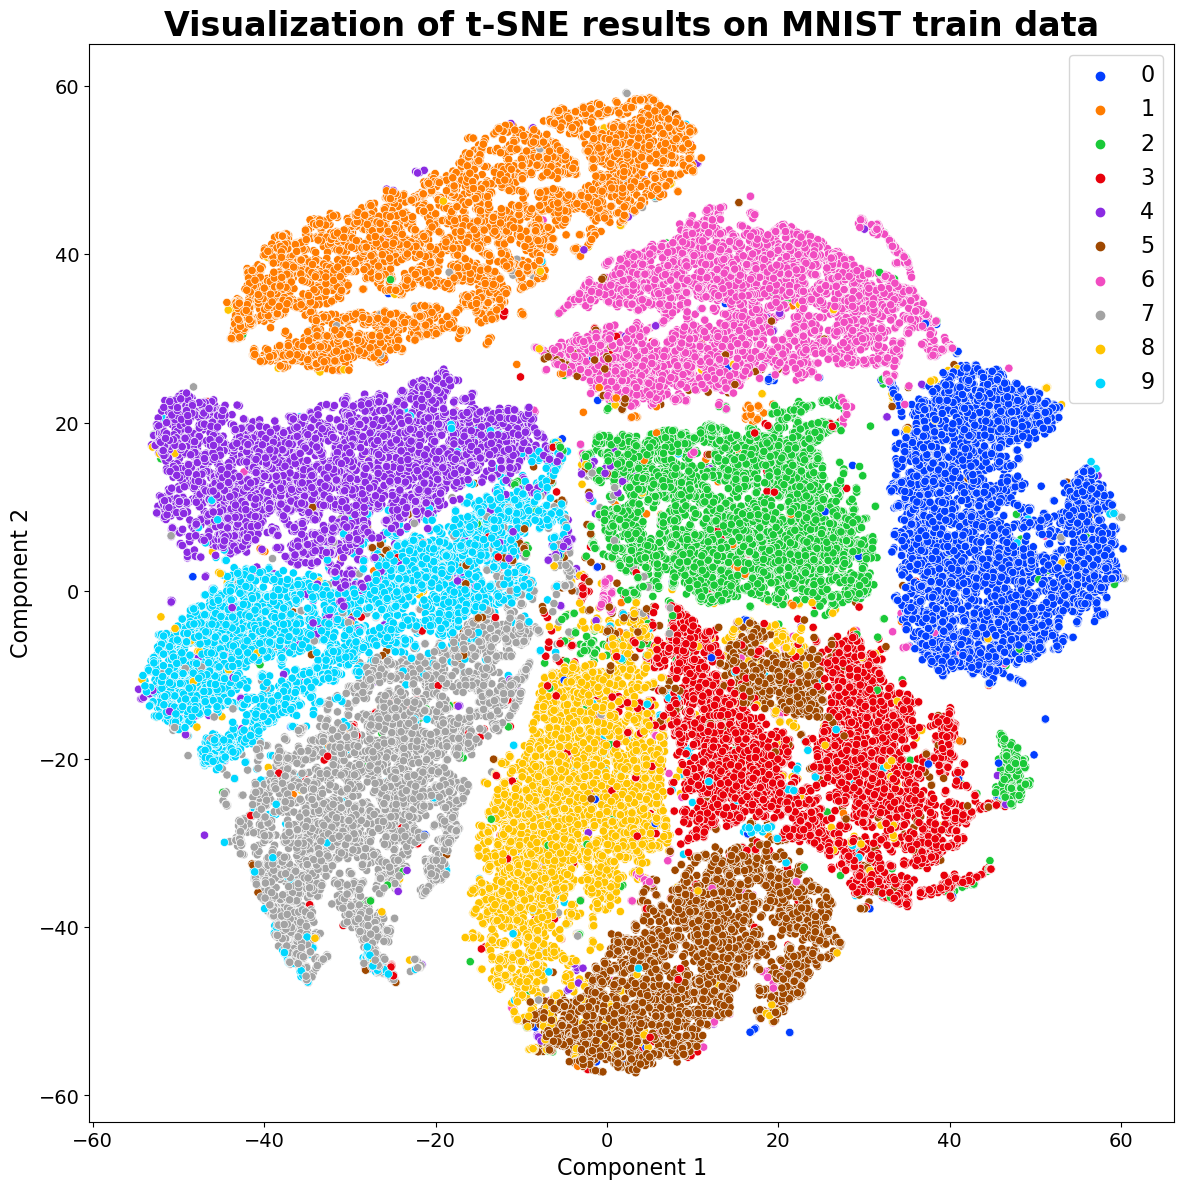

In [23]:
import seaborn as sns

plt.figure(figsize=(14, 14))
plt.title("Visualization of t-SNE results on MNIST train data", fontsize=24, weight='bold')
sns.scatterplot(tsne_res[:, 0], tsne_res[:, 1], data = tsne_res, hue=y_train, palette="bright", legend="full")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Component 1", fontsize=16)
plt.ylabel("Component 2", fontsize=16)
plt.legend(fontsize=16);

Anomally Detection with PCA

In [24]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = pd.DataFrame(x_train.reshape(60000,x_train.shape[1]**2))

In [25]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x_train)
inverse_pca_data = pca.inverse_transform(pca_data)

print("x_train shape",x_train.shape)
print("pca_data shape",pca_data.shape)
print("inverse_pca_data shape",inverse_pca_data.shape)

x_train shape (60000, 784)
pca_data shape (60000, 5)
inverse_pca_data shape (60000, 784)


In [27]:
# Reconstruction Error
MSE = ((x_train-inverse_pca_data)**2).sum(axis=1)

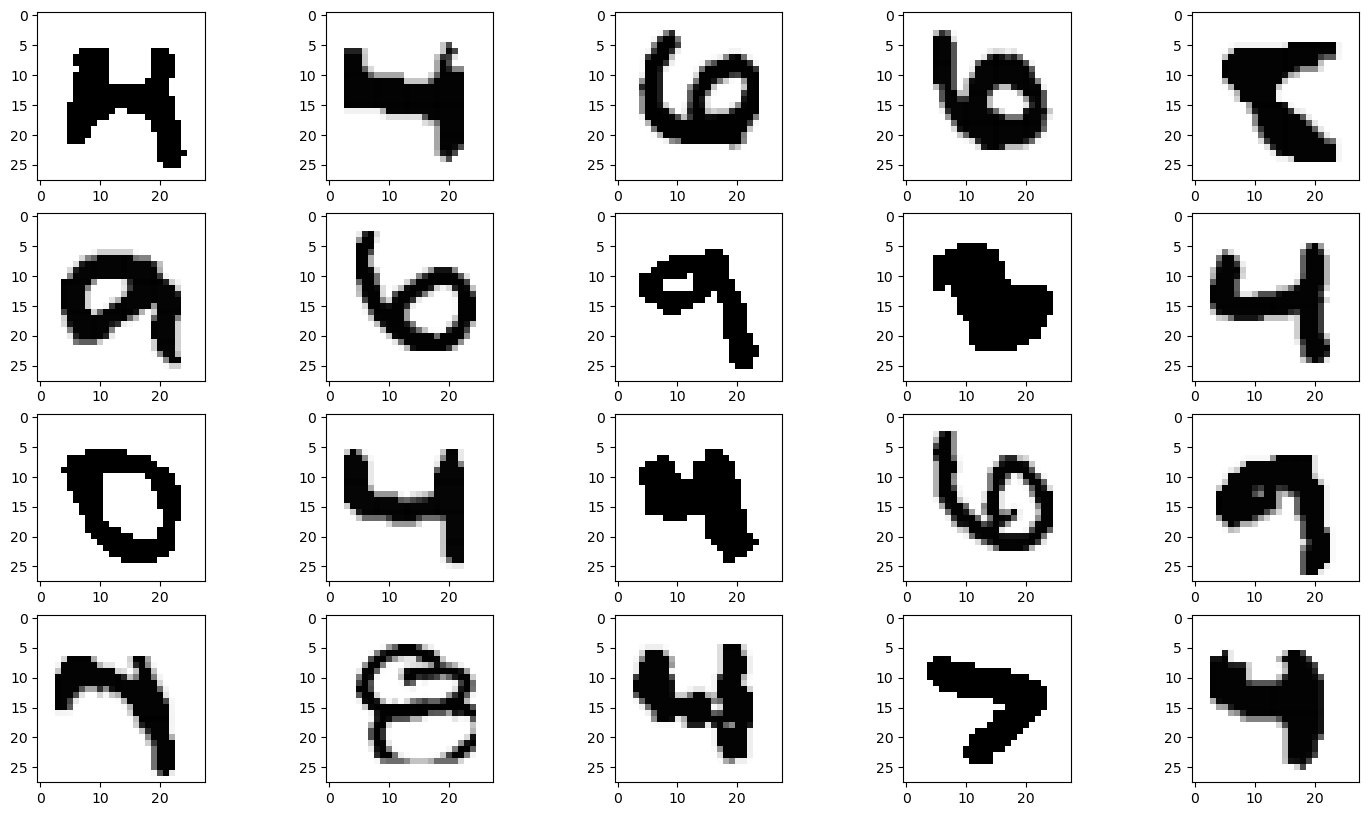

In [28]:
# Visualization 20 digits with the highest MSE ( decreasing from left to right )

MSE_max_scores = MSE.nlargest(20).index

plt.figure(figsize = (18,10))

for i in range(20):  
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train.iloc[MSE_max_scores[i]].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()